## How sample size influence cross-validation results

In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target
target *= 100  # rescale the target in k$

In [2]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

The learning curve is a plot of the train and test scores by varing the number of training samples. This gives relevant information on the benefits of adding new training samples to improve a model's statistical performance. In the code blocks that follow, we will compute the learning curve for a decision tree and vary the proportion of the training set from 10% to 100%. 

In [3]:
import numpy as np
train_sizes = np.linspace(0.1, 1.0, num=5, endpoint=True)
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

We will use a `ShuffleSplit` cross validation to assess our predictive model 

In [4]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2)

In [5]:
from sklearn.model_selection import learning_curve

results = learning_curve(
    regressor, data, target, train_sizes=train_sizes, cv = cv, 
    scoring="neg_mean_absolute_error", n_jobs=2
    #Why are we working with negative mean absolute error, why can't we work with the direct mean absolute error?
)

train_sizes, train_scores, test_scores = results[:3]
#convert the scores into errors
train_errors, test_errors = -train_scores, -test_scores

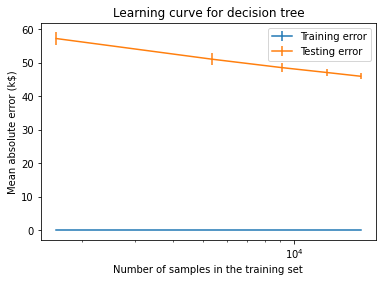

In [7]:
#Plot the curve
import matplotlib.pyplot as plt

plt.errorbar(train_sizes, train_errors.mean(axis=1),
            yerr=train_errors.std(axis=1), label = "Training error")

plt.errorbar(train_sizes, test_errors.mean(axis=1),
            yerr=test_errors.std(axis=1), label = "Testing error")

plt.legend()

plt.xscale("log")
plt.xlabel("Number of samples in the training set")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Learning curve for decision tree")

A quick look at the training error shows that we only have an error of 0 k$ which implies that the trained model (i.e. decision tree) is overfitting the training data. The testing error, on the other hand, shows that the more samples we add into the train sets, the lower the testing error becomes. 
We should, nonetheless, keep it in mind that we are on the look out for the plateau of the testing error for which there is no benefit to adding samples anymore or assessing the potential gain of adding more samples into the training set. If this plateau is reached, where new samples in the training set does not reduce the testing error, it is probable that we reached the Bayes error rate using the available model. At that point, using a more complex model might be the only possibility to reduce the testing error further.